In [1]:
from tensorflow.keras.datasets import cifar10

(train_image, train_label), (test_image, test_label) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [2]:
import numpy as np
import pandas as pd

CAT_VALUE = 3
DOG_VALUE = 5

condition_train = (train_label[:,0]==CAT_VALUE) | (train_label[:,0]==DOG_VALUE)
condition_test = (test_label[:,0]==CAT_VALUE) | (test_label[:,0]==DOG_VALUE)

x_train = train_image[condition_train]
y_train = train_label[condition_train]
x_test = test_image[condition_test]
y_test = test_label[condition_test]

print('x_train shape is ', x_train.shape)
print('y_train shape is ', y_train.shape)
print('\nx_test shape is ', x_test.shape)
print('y_test shape is ', y_test.shape)

x_train shape is  (10000, 32, 32, 3)
y_train shape is  (10000, 1)

x_test shape is  (2000, 32, 32, 3)
y_test shape is  (2000, 1)


데이터 분석 (Data Analysis)
고양이와 강아지의 데이터셋은 다음과 같다.

x_train: 32x32x3(RGB), 10,000개의 훈련을 위한 고양이와 강아지의 이미지

y_train: 10,000개의 이미지를 고양이(3), 강아지(5)의 두가지 정수 값으로 라벨링

x_test: 32x32x3(RGB), 2,000개의 테스트를 위한 고양이와 개의 이미지

y_test: 2,000개의 이미지를 고양이(3), 강아지(5)의 두가지 정수 값으로 라벨링

10개의 훈련 이미지와 레이블은 아래와 같다.


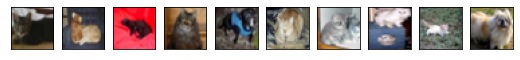

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,90))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
y_train[:10]

array([[3],
       [3],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [3],
       [5]], dtype=uint8)

컬러(RGB)이미지의 모든 픽셀값을 피쳐(특징값)로 사용하는 것은 무리다.

예를 들어서 1000X1000의 컬러 이미지의 입력 피쳐 개수는 무려
3,000,000개가 된다.

컴퓨터가 싫어한다…

그래서 엔지니어들은
피쳐 개수를 줄이면서도
이미지의 특징을 잘 보여주는
엣지(Edge) 있는 방법을 찾아 냈다.

그것은 바로…

Edge Detection
엔지니어들은 이미지의 특징을 추출하기 위해서 컨벌루션(Convolution)이라는 기법을 개발했다.

컨벌루션은 이미지에 3X3이나 5X5 필터를 오른쪽과 아래로 이동하며 적용하는 기술이다.
컨벌루션



필터에 들어가는 값에 따라서 다양한 이미지의 특징들을 보여준다.


아래는 sobel_h, sobel_v 필터링 적용 예다.


왼쪽은 원본 이미지, 중간은 물체의 가로 경계선이 강조되는 sobel_h 필터를 적용한 이미지,
 오른쪽은 물체의 세로 경계선이 강조되는 sobel_v 필터를 적용한 이미지다.

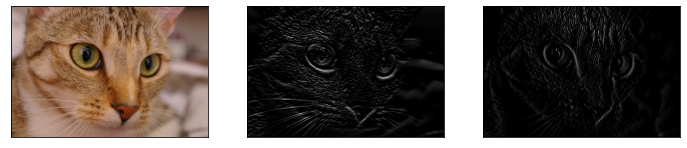

In [5]:
from skimage.data import chelsea
from skimage.filters import sobel_h, sobel_v
from skimage.color import rgb2gray

# INPUT
image = chelsea()
grey_image = rgb2gray(image)

# CONV
edge_h = sobel_h(grey_image)
edge_v = sobel_v(grey_image)

# ReLU
edge_h = np.where(edge_h < 0, 0, edge_h)
edge_v = np.where(edge_v < 0, 0, edge_v)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(edge_h, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(edge_v, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# 정규화

In [8]:
y_train = np.where(y_train==3, 0, 1)
y_test = np.where(y_test==3, 0, 1) 
#이진분류 

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import os

save_dir = os.getcwd()
model_name = 'keras_catdog_trained_model.h5'

batch_size = 32
epochs = 100

model = Sequential()
# CONV 32 X2
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# POOL
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV 64 X2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# POOL
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Vectorize
model.add(Flatten())
# FC 512
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# OUTPUT
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#모델링

NameError: ignored

In [2]:
hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              shuffle=True,
              verbose=0)

# Save model and weights
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

train_acc = hist.history['acc'][-1]
train_loss =  hist.history['loss'][-1]

print('train accuracy: ', train_acc)
print('train loss: ', train_loss)

NameError: ignored

In [3]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

NameError: ignored

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
#정확도평가

NameError: ignored

In [ ]:
import pandas as pd

df = pd.DataFrame(data=[[train_acc, test_acc]], 
                  index = ['CNN'],
                  columns=['train accuracy', 'test accuracy'])
df

In [ ]:
from  tensorflow.keras.models import load_model
import os

load_dir = os.getcwd()
model_name = 'keras_catdog_trained_model.h5'
model_path = os.path.join(load_dir, model_name)

pick_image = 30 # 0 ~ 1,999

def predict_catdog(x, model):
    x_data =(np.expand_dims(x, 0))
    predict = model.predict(x_data)
    #print(predict)
    if predict < 0.5:
        return 'cat'
    else:
        return 'dog'

test_data = x_test[pick_image]
model = load_model(model_path)

result = predict_catdog(test_data, model)

plt.figure(figsize=(2,2))
plt.imshow(test_data)
plt.xticks([])
plt.yticks([])
plt.show()
print('This is a ', result)